# TASK_1
## Iris classification
### Done by :- Vatsavai Vinay Varma

## Importing required libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Reading data set using pandas 

In [10]:
iris_data = pd.read_csv("C:\\Users\\vinnu\\OneDrive\\Desktop\\Iris.csv")

In [11]:
data=iris_data.drop(['Id'], axis=1)

In [12]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [13]:
rows, cols = data.shape
print("Number of rows", rows)
print("Number of columns", cols)

Number of rows 150
Number of columns 5


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [15]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualisation

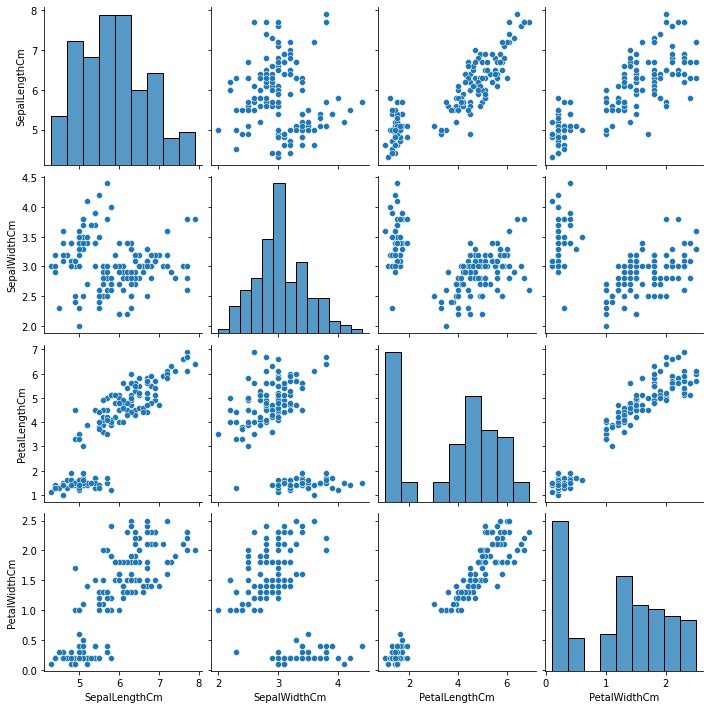

In [16]:
sns.pairplot(data)

C:\Users\vinnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

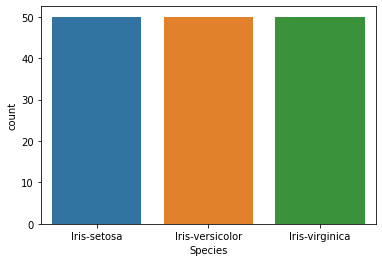

In [17]:
sns.countplot(data['Species'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

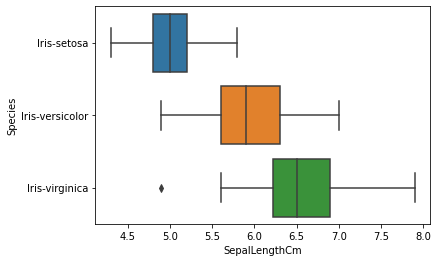

In [18]:
sns.boxplot(y = data['Species'], x = data['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

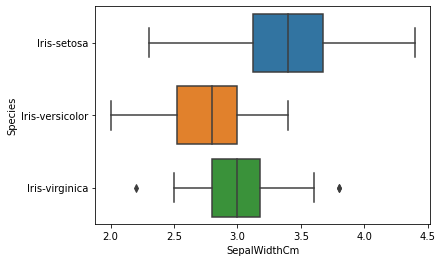

In [19]:
sns.boxplot(y = data['Species'], x = data['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

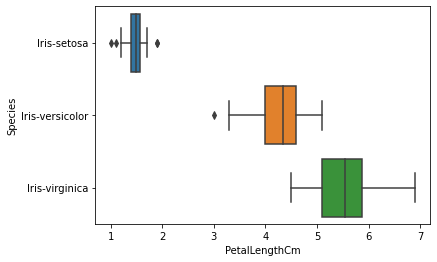

In [20]:
sns.boxplot(y = data['Species'], x = data['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

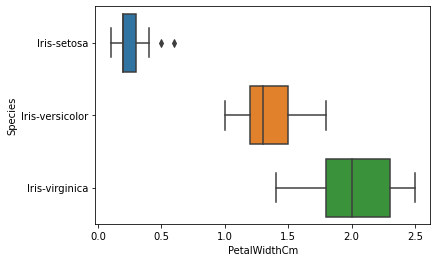

In [21]:
sns.boxplot(y = data['Species'], x = data['PetalWidthCm'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

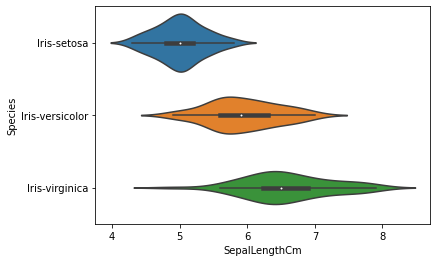

In [22]:
sns.violinplot(y = data['Species'], x = data['SepalLengthCm'])

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

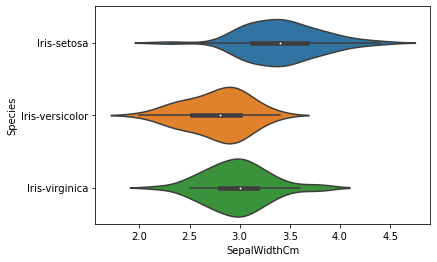

In [23]:
sns.violinplot(y = data['Species'], x = data['SepalWidthCm'])

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

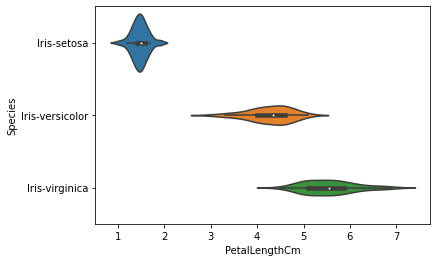

In [24]:
sns.violinplot(y = data['Species'], x = data['PetalLengthCm'])

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

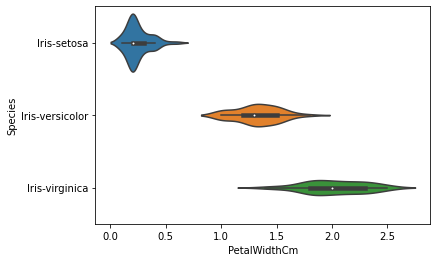

In [25]:
sns.violinplot(y = data['Species'], x = data['PetalWidthCm'])

## Correlation

In [26]:
correlations = data.corr(method='pearson')

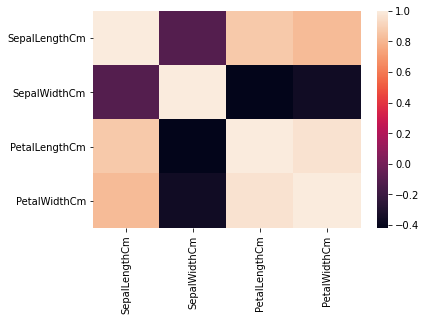

In [27]:
sns.heatmap(correlations)
plt.show()

## Splitting train and test data sets 

In [28]:
X=data.iloc[:, :-1]
y =data.iloc[:, -1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Creating classifier

In [30]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [31]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Making predictions and calculating the accuracy

In [32]:
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


## Plotting confusion matrix

In [33]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


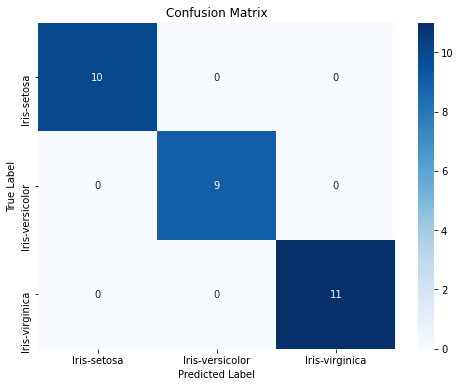

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=data['Species'].unique(), 
            yticklabels=data['Species'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Take input from the user for prediction 

In [35]:
input_data = []
print("Enter the values for sepal length, sepal width, petal length, petal width:")
for feature in X.columns:
    value = float(input(f"{feature}: "))
    input_data.append(value)


Enter the values for sepal length, sepal width, petal length, petal width:
SepalLengthCm: 5
SepalWidthCm: 4
PetalLengthCm: 5
PetalWidthCm: 4


## Make predictions on the input data

In [36]:
input_sample = [input_data]
predicted_output = classifier.predict(input_sample)

In [37]:
print('Predicted Species:', predicted_output[0])

Predicted Species: Iris-virginica
